## 5.1 多层感知机

上一章咱们学习了浅层线性神经网络，用它解决了简单的线性回归和多分类任务，想必同学们对神经网络的妙用已经开始有了一些体会，对pytorch的上手使用也有了初步的感性认识。本章我们将开始学习更加复杂的深层神经网络。首先，就是最简单的多层感知机（Multilayer Perceptron，MLP）了。它是一种非常流行的神经网络模型，包含至少一个隐藏层和输出层。先来看看和浅层神经网络相比，它的好处，或者说为什么要用它？

一般来说，使用多层感知机的原因包括：

1. 更好的解决非线性问题。多层感知机可以通过训练权值参数来学习非线性函数，这对于解决很多实际问题是很有用的。咱们前面学习的浅层神经网络只能解决线性问题或者简单的非线性问题，遇到稍微复杂点的数据就束手无策了。

2. 它有较高的准确率。多层感知机可以通过训练来获得较高的准确率，尤其是当数据集较大时。虽然和后面学的动辄几十、上百，乃至上千层的神经网络没法比，但是MLP是它们的基础。先学好它，后面的学习会更容易。

3. 它具有较好的泛化能力。多层感知机可以很好地适应新的数据，这使得它对于未来的数据具有较好的泛化能力。

4. 它的训练方式灵活。多层感知机可以使用不同的优化算法和损失函数来训练，这使得它可以应用于各种不同的场景。

知道了MLP的这么多好处，先来看看它的构成。

### 5.1.1 隐藏层

多层感知机（Multilayer Perceptron, MLP）是一种前馈神经网络，它由输入层、隐藏层和输出层组成。输入层接收输入数据，隐藏层负责处理数据，输出层输出处理后的结果。

<img src="../images/5-1-1.webp" width="50%"></img>


隐藏层是多层感知机中最重要的一层。它位于输入层和输出层之间，不能直接与输入和输出打交道。隐藏层的作用是学习数据的高级表示，从而提高模型的准确度。

隐藏层中的神经元接收输入层的输入数据，并使用权值和阈值进行线性组合，然后通过激活函数进行非线性转换。激活函数的作用是使得模型能够拟合非线性数据。常用的激活函数包括 sigmoid 函数、tanh 函数和 ReLU 函数。

隐藏层的数量和大小对模型的性能有很大影响。如果隐藏层数量和大小均较小，则模型的表示能力较弱，可能无法准确地拟合训练数据。如果隐藏层数量和大小均较大，则模型的表示能力较强，但容易过拟合，即模型在训练数据上表现良好，但在测试数据上表现不佳。因此，在设计多层感知机时，需要考虑隐藏层的数量和大小，以达到较好的模型性能。

此外，隐藏层中的神经元也可以使用不同的激活函数，这样可以让模型具有更强的表示能力。在实际应用中，我们可以使用超参数搜索来找到最优的隐藏层结构。

在多层感知机中，隐藏层的数学表示为：

$$h = f(W_hh_{prev} + b_h)$$

其中，$h$ 是隐藏层的输出，$h_{prev}$ 是上一层（通常是输入层）的输出，$W_h$ 是隐藏层的权值矩阵，$b_h$ 是隐藏层的偏置向量，$f(\cdot)$ 是激活函数。

### 5.1.2 激活函数

激活函数是神经网络中非常重要的组成部分，它起到了非线性转换的作用。常见的激活函数有 sigmoid 函数、tanh 函数、ReLU 函数和 softmax 函数。

**1. Sigmoid 函数**

Sigmoid 函数是一种 S 形曲线，其表达式为：

$$f(x) = \frac{1}{1 + e^{-x}}$$

在 PyTorch 中，可以使用 torch.nn 模块中的函数来实现上述激活函数并可视化它的图像。

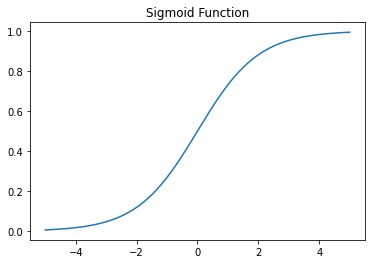

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 200)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.title("Sigmoid Function")
plt.show()


Sigmoid 函数的优点是输出值域范围为 (0,1)，适合二分类问题。缺点是当输入较大时，梯度较小，容易导致梯度消失问题。

**2. Tanh 函数**

Tanh 函数是一种双曲正切函数，其表达式为：

$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

下面是它的pytorch实现和可视化。

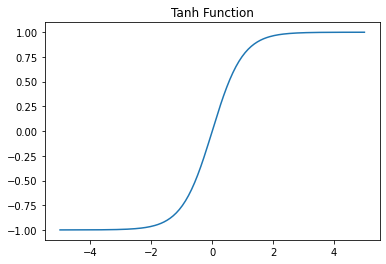

In [1]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 200)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.title("Tanh Function")
plt.show()


Tanh 函数的优点是输出值域范围为 (-1,1)，适合二分类问题。缺点是当输入较大时，梯度较小，容易导致梯度消失问题。

**3. ReLU 函数**

ReLU 函数（Rectified Linear Unit）是一种线性函数，其表达式为：

$$f(x) = \max(0, x)$$

运行下面的代码能够看到它的图像。

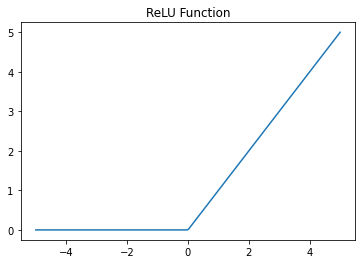

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 200)
y = torch.relu(x)

plt.plot(x.numpy(), y.numpy())
plt.title("ReLU Function")
plt.show()


ReLU 函数的优点是计算简单，速度快。缺点是当输入小于0时，输出为0，容易导致梯度消失问题。

**4. Softmax 函数**

Softmax 函数是一种常用的多分类激活函数，其表达式为：

$$f_i(x) = \frac{e^{x_i}}{\sum_{j=1}^{n}e^{x_j}}$$

其中，$n$ 是类别数，$x_i$ 是输入数据的第 $i$ 个元素，$f_i(x)$ 是输出数据的第 $i$ 个元素。

Softmax 函数的作用是将输入数据转化为概率分布，使得每一类的概率和为1。它的优点是适合多分类问题，缺点是计算量较大。

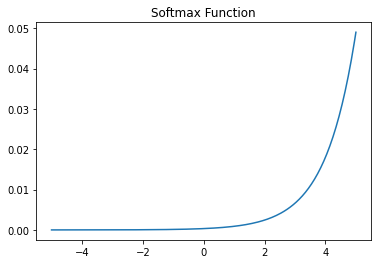

In [1]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 200)
y = torch.softmax(x, dim=0)

plt.plot(x.numpy(), y.numpy())
plt.title("Softmax Function")
plt.show()


**梗直哥提示：其实介绍了这么多激活函数，你只要记着Sigmoid和Tanh 函数适用于二分类问题，ReLU 函数适用于大多数任务，Softmax函数适用于多分类问题就行了。当然实战中，还有很多各种各样的变体。如果你对这方面的进阶内容和实战内容感兴趣，欢迎入群学习（加V: gengzhige99）**

[Next 5-2多层感知机代码实现](./5-2%20多层感知机代码实现.ipynb)